![insomnia](insomnia.jpg)


# SleepInc: Helping you find better sleep 😴

## 📖 Background

Your client is SleepInc, a sleep health company that recently launched a sleep-tracking app called SleepScope. The app monitors sleep patterns and collects users' self-reported data on lifestyle habits. SleepInc wants to identify lifestyle, health, and demographic factors that strongly correlate with poor sleep quality. They need your help to produce visualizations and a summary of findings for their next board meeting! They need these to be easily digestible for a non-technical audience!

## 💪 Challenge

Leverage this sleep data to analyze the relationship between lifestyle, health, demographic factors, and sleep quality. Your goal is to identify factors that correlate with poor sleep health.

Some examples:

- Examine relationships between several factors like gender, occupation, physical activity, stress levels, and sleep quality/duration. Create visualizations to present your findings.
- Produce recommendations on ways people can improve sleep health based on the patterns in the data.
- Develop an accessible summary of study findings and recommendations for improving sleep health for non-technical audiences.

# Summary and Recomendation

## Summary of Process and Findings

We reccomend that in order to improve your quality of sleep, one should make sure they...
- Maintain a healthy body weight
- Achieve 8-8.5 hours of sleep a night
- Have regular physical activity
- Lower stress

## Findings

In this notebook, we explore a dataset consisting of the information of the details pertaining to peoples sleep. We start by exploring the dataset and exploration the distrubtion of data. Following this, we start by examning the relationship between columns in the dataset in order to view how aspects of life go hand in hand with sleep.
In these explorations we found...
- Sleep Duration and Sleep Quality is positivly correlated
- Mean, and median sleep quality varies by occupation
- The occupations that recieve longer durations of sleep also enjoy better sleep quality
- Younger people tend to have lower sleep quality and sleep quality apppears to increase with age, reaching its peak around age 53
- Increased Physical Activity Level correlates to higher quality of sleep in most BMI Category groups
- Stress and Heart Rate are negativly correlated to Quality of Sleep: The higher ones stress and heart rate, usually the worse ones quality of sleep
- BMI Category group is negativly correlated with sleep quality: The higher ones BMI, usually the worse ones quality of sleep

# Exploring Data

Taking a look at the dataset to get a better idea so we can approach the problem. We start by checking out the columns, na values, and outliers.

In [1]:
import pandas as pd
df = pd.read_csv('../datasets/sleep/sleep_health_data.csv')
df

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [3]:
df.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


In [4]:
def na_analysis(df):
    """
    Examine NA values in a DataFrame.
    
    Arguments:
        df (DataFrame): A pandas DataFrame for analysis.
    
    Returns:
        pd.DataFrame: DataFrame containing information about the examination.
        """
    # counting na values
    na_count = df.isna().sum()
    
    # getting ratio of na values to rest of DataFrame
    na_ratio = na_count / len(df)
    
    # making the return DataFrame
    result = pd.DataFrame({
        'Column Name': na_count.index,
        'NA Value Counts' : na_count.values,
        'NA Value Ratio' : na_ratio.values.round(2)
    })
    
    return result.sort_values('NA Value Ratio', ascending = False)

na_analysis(df)

,Column Name,NA Value Counts,NA Value Ratio
0,Person ID,0,0.0
1,Gender,0,0.0
2,Age,0,0.0
3,Occupation,0,0.0
4,Sleep Duration,0,0.0
5,Quality of Sleep,0,0.0
6,Physical Activity Level,0,0.0
7,Stress Level,0,0.0
8,BMI Category,0,0.0
9,Blood Pressure,0,0.0


In [5]:
# finding outliers
def outliers(col):
    seventy_fifth = col.quantile(0.75)
    twenty_fifth = col.quantile(0.25)
    # calculate IQR
    iqr = seventy_fifth - twenty_fifth
    # upper and lower thresholds
    upper = seventy_fifth + (iqr*1.5)
    lower = twenty_fifth - (iqr*1.5)
    # filter for outliers
    outliers = ((col > upper) | (col < lower))
    return outliers

# number of outliers
outliers_count = df.select_dtypes(include=['float64','int64']).apply(outliers).sum()
# outliers_ratio = outliers_count.apply(lambda x: len(x)/len(df))
outliers_ratio = outliers_count/len(df)

# ratio of outliers as a precent
display(outliers_ratio * 100)

# keeping outliers for Heart Rate Column
outliers_heart_rate = outliers(df['Heart Rate'])
display(df[outliers_heart_rate])

Person ID                  0.000000
Age                        0.000000
Sleep Duration             0.000000
Quality of Sleep           0.000000
Physical Activity Level    0.000000
Stress Level               0.000000
Heart Rate                 4.010695
Daily Steps                0.000000
dtype: float64

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
5,6,Male,28,Software Engineer,5.9,4,30,8,Obese,140/90,85,3000,Insomnia
6,7,Male,29,Teacher,6.3,6,40,7,Obese,140/90,82,3500,Insomnia
16,17,Female,29,Nurse,6.5,5,40,7,Normal Weight,132/87,80,4000,Sleep Apnea
18,19,Female,29,Nurse,6.5,5,40,7,Normal Weight,132/87,80,4000,Insomnia
80,81,Female,34,Scientist,5.8,4,32,8,Overweight,131/86,81,5200,Sleep Apnea
81,82,Female,34,Scientist,5.8,4,32,8,Overweight,131/86,81,5200,Sleep Apnea
93,94,Male,35,Lawyer,7.4,7,60,5,Obese,135/88,84,3300,Sleep Apnea
145,146,Female,38,Lawyer,7.4,7,60,5,Obese,135/88,84,3300,Sleep Apnea


## Creating a categorical column for sleep quality

In [6]:
# creating this column will allow us to impute this onto our plots to get a better picture of the relationships in the data
sleep_quality_dict = {'low':2.5,'medium-low':5,'medium-high':7.5,'high':10}

# df['Sleep Quality Classification'] = df['Quality of Sleep']
df['Sleep Quality Classification'] = df['Quality of Sleep'].apply(lambda x: next((k for k, v in sleep_quality_dict.items() if x < v), None))

df[['Sleep Quality Classification','Quality of Sleep']].head(n=10)

,Sleep Quality Classification,Quality of Sleep
0,medium-high,6
1,medium-high,6
2,medium-high,6
3,medium-low,4
4,medium-low,4
5,medium-low,4
6,medium-high,6
7,medium-high,7
8,medium-high,7
9,medium-high,7


# Plotting


When plotting the relationship between sleep duration and quality of sleep, we observe that usually, the more a person sleeps, the higher the quality of their sleep.

Text(0.5, 1.0, 'Relationship Between Sleep Duration and Quality of Sleep')

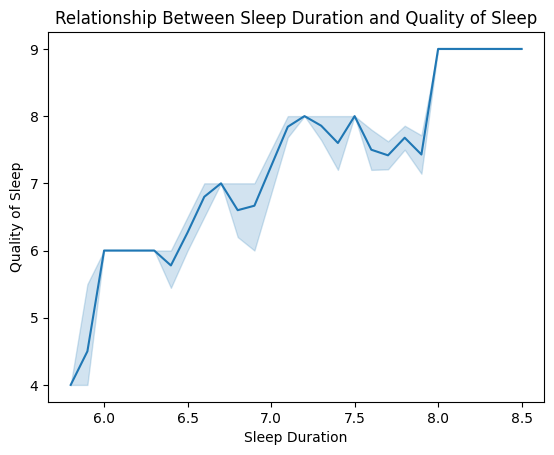

In [7]:
# making exploratory plots
import matplotlib.pyplot as plt
import seaborn as sns

ax = sns.lineplot(data=df, x='Sleep Duration',y='Quality of Sleep')
ax.set_title('Relationship Between Sleep Duration and Quality of Sleep')


With the previous information in mind, let's examine the relationship between someone's occupation and their sleep quality, considering the duration of their sleep. Based on the previous plot, we can expect that a higher average sleep duration in a career corresponds to better sleep quality. Let's test if this is indeed the case!

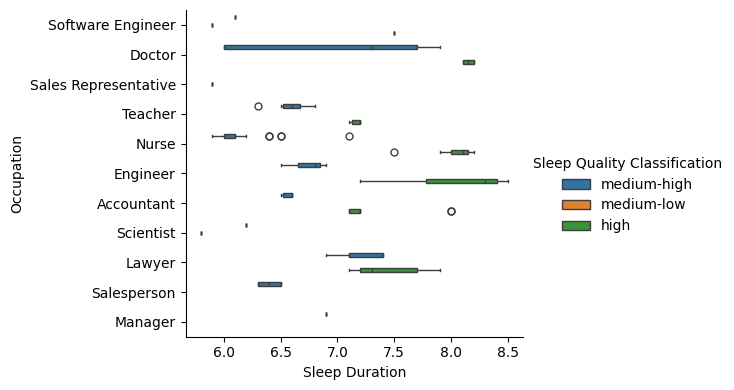

In [8]:
# seeing if certain careers average different amounts of sleep by gender
sns.catplot(data=df,y='Occupation', x='Sleep Duration', kind='box', height=4,aspect=1.5, gap=0.5, native_scale=True, hue='Sleep Quality Classification')
plt.show()

We haven't taken age into account, so let's see if someone's age has any relationship to sleep quality.

Those getting higher-quality sleep tend to be older, while younger people tend to have worse sleep quality.

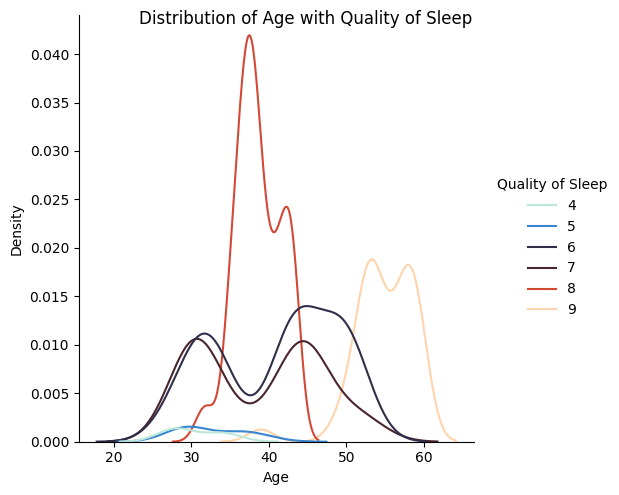

In [16]:
g = sns.displot(data=df, x='Age', hue='Quality of Sleep',kind='kde',palette='icefire')  
g.fig.suptitle('Distribution of Age with Quality of Sleep')
plt.show()

Let's take a look at the relationship between things people can directly change and sleep quality. While we are at it, we can also explore the role of body weight in sleep.

It appears that those in the Obese and Normal Weight categories who exercise more correlate to better sleep quality. The Overweight group shows a similar benefit, up to around a Physical Activity Level of 75~, but drops off after this. This could be a result of a lack of data or sampling issues. The Normal BMI Category group, interestingly enough, has a drop in sleep quality when exercising more. However, this plot does show that increased physical activity correlates with better sleep.

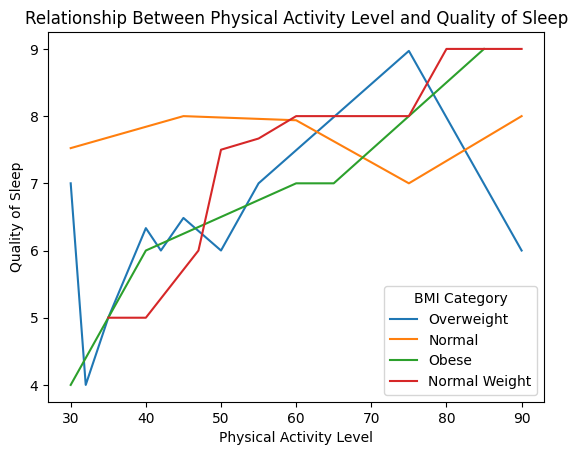

In [10]:
ax = sns.lineplot(df, x='Physical Activity Level', y='Quality of Sleep',hue='BMI Category',ci=None)
ax.set_title('Relationship Between Physical Activity Level and Quality of Sleep')
plt.show()

When examining the relationship between Stress Level and Heart Rate with respect to Sleep Quality, we see that Stress Level and Heart Rate have a positive correlation. This means that those with a lower heart rate and stress level also have better sleep quality. Conversely, the higher these metrics, the worse the sleep quality.

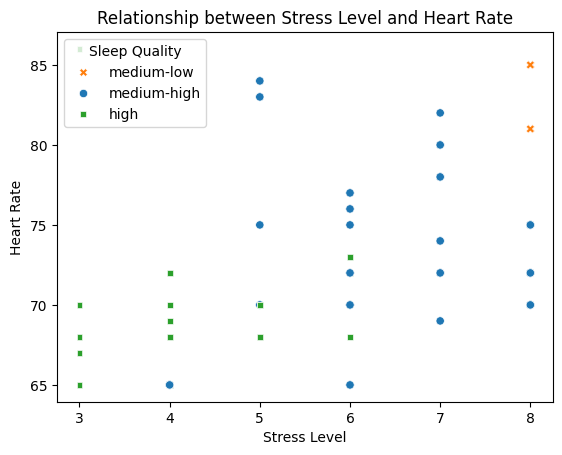

In [11]:
# plotting
ax = sns.scatterplot(data=df, x='Stress Level',y='Heart Rate', hue='Sleep Quality Classification', style='Sleep Quality Classification')
ax.set_title("Relationship between Stress Level and Heart Rate")
# reordering the legend
handles, labels = plt.gca().get_legend_handles_labels() 
order = [1, 0, 2] 
plt.legend([handles[i] for i in order], [labels[i] for i in order], loc = 'upper left', title='Sleep Quality')
plt.show()

Finally, we will examine the relationship between BMI Category and Sleep Quality Category. According to this plot, those in the Normal Weight classes enjoy better sleep, with the majority experiencing high levels of Sleep Quality. However, when moving to the other end of the spectrum, those who are Overweight have a majority of records indicating slightly worse sleep quality. Then, moving to the Obese category, medium-low sleep quality is much more frequent, signifying that the higher your weight, the worse your sleep quality will be on average.

<AxesSubplot: xlabel='BMI Category', ylabel='percent'>

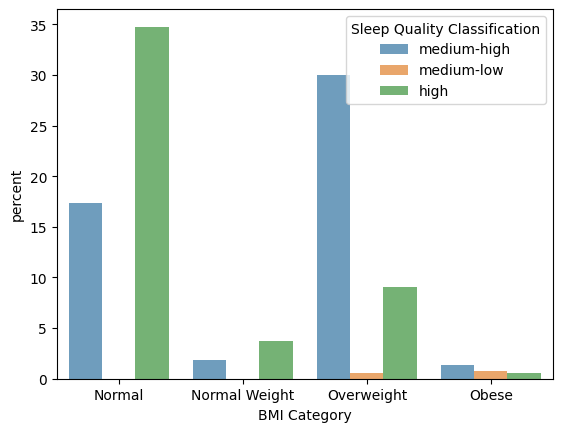

In [12]:
sns.countplot(data=df,x='BMI Category',hue='Sleep Quality Classification',order=['Normal','Normal Weight','Overweight','Obese'],alpha=0.7, stat='percent')

# The End!